In [1]:
%%writefile scripts/download_data.py
import pandas as pd

CO2_URL = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
ENERGY_URL = "https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv"

def download():
    print("Downloading CO₂ data...")
    co2 = pd.read_csv(CO2_URL)
    co2.to_csv("data/raw/co2.csv", index=False)
    print("Saved CO₂ data to data/raw/co2.csv")

    print("Downloading Energy data...")
    energy = pd.read_csv(ENERGY_URL)
    energy.to_csv("data/raw/energy.csv", index=False)
    print("Saved Energy data to data/raw/energy.csv")

    print("Download completed.")

if __name__ == "__main__":
    download()

Overwriting scripts/download_data.py


In [2]:
!python scripts/download_data.py

Saved CO₂ data to data/raw/co2.csv
Saved Energy data to data/raw/energy.csv
Download completed.


In [3]:
import os
import pandas as pd
os.makedirs("data/processed", exist_ok=True)

In [7]:
%%writefile scripts/preprocess.py
import pandas as pd
import numpy as np

def preprocess():

    co2 = pd.read_csv("data/raw/co2.csv")
    energy = pd.read_csv("data/raw/energy.csv")


    co2_cols = [
        "country", "year",
        "co2", "co2_per_capita", "co2_growth_prct",
        "share_global_co2", "gdp",
        "population", "coal_co2", "oil_co2", "gas_co2",
        "cement_co2", "flaring_co2"
    ]
    co2 = co2[co2_cols]


    energy_cols = [
        "country", "year",
        "primary_energy_consumption",
        "renewables_share_energy",
        "fossil_share_energy",
        "low_carbon_share_energy",
        "wind_share_energy",
        "solar_share_energy",
        "biofuel_consumption",
        "biofuel_share_energy",
        "coal_consumption",
        "coal_share_energy",
        "electricity_demand",
        "electricity_generation",
        "electricity_share_energy",
        "gas_consumption",
        "gas_share_energy",
        "greenhouse_gas_emissions",
        "hydro_consumption",
        "hydro_share_energy",
        "low_carbon_consumption",
        "nuclear_consumption",
        "nuclear_share_energy",
        "oil_consumption",
        "oil_share_energy",
        "other_renewable_consumption",
        "other_renewables_share_energy",
        "renewables_consumption",
        "solar_consumption",
        "wind_consumption",
        "iso_code"
    ]
    energy = energy[energy_cols]


    df = pd.merge(co2, energy, on=["country", "year"], how="inner")


    df = df[~df["country"].isin([
        "World", "Asia", "Europe", "North America", "South America",
        "Africa", "European Union (27)", "Oceania", "International transport"
    ])]


    df = df.dropna(subset=["co2", "year"])


    df.to_csv("data/processed/global_panel.csv", index=False)
    print("Saved processed dataset to data/processed/global_panel.csv")

if __name__ == "__main__":
    preprocess()

Overwriting scripts/preprocess.py


In [8]:
pd.read_csv("data/raw/co2.csv")

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50406,Zimbabwe,2020,ZWE,15526887.0,2.317871e+10,0.496,0.032,8.491,-1.776,-17.298,...,NaN,0.106,0.001,0.001,0.002,0.0,24.146,14.463,1.991,23.450
50407,Zimbabwe,2021,ZWE,15797220.0,2.514009e+10,0.542,0.034,10.223,1.732,20.398,...,NaN,0.105,0.001,0.001,0.002,0.0,27.907,16.408,2.137,20.899
50408,Zimbabwe,2022,ZWE,16069061.0,2.590159e+10,0.387,0.024,12.232,2.009,19.653,...,NaN,0.104,0.001,0.001,0.002,0.0,29.917,18.830,1.380,11.283
50409,Zimbabwe,2023,ZWE,16340829.0,NaN,0.387,0.024,13.443,1.211,9.904,...,NaN,0.103,0.001,0.001,0.002,0.0,31.029,20.318,1.876,13.957


In [9]:
!python scripts/preprocess.py

Saved processed dataset to data/processed/global_panel.csv


In [10]:
import pandas as pd
df = pd.read_csv("data/processed/global_panel.csv")
df.head()

,country,year,co2,co2_per_capita,co2_growth_prct,share_global_co2,gdp,population,coal_co2,oil_co2,...,nuclear_consumption,nuclear_share_energy,oil_consumption,oil_share_energy,other_renewable_consumption,other_renewables_share_energy,renewables_consumption,solar_consumption,wind_consumption,iso_code
0,Afghanistan,1949,0.015,0.002,NaN,0.000,NaN,7356890.0,0.015,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG
1,Afghanistan,1950,0.084,0.011,475.000,0.001,9.421400e+09,7776180.0,0.021,0.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG
2,Afghanistan,1951,0.092,0.012,8.696,0.001,9.692280e+09,7879343.0,0.026,0.066,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG
3,Afghanistan,1952,0.092,0.011,0.000,0.001,1.001732e+10,7987784.0,0.032,0.060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG
4,Afghanistan,1953,0.106,0.013,16.000,0.002,1.063052e+10,8096703.0,0.038,0.068,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15098 entries, 0 to 15097
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        15098 non-null  object 
 1   year                           15098 non-null  int64  
 2   co2                            15098 non-null  float64
 3   co2_per_capita                 15025 non-null  float64
 4   co2_growth_prct                14994 non-null  float64
 5   share_global_co2               15098 non-null  float64
 6   gdp                            11412 non-null  float64
 7   population                     15025 non-null  float64
 8   coal_co2                       11678 non-null  float64
 9   oil_co2                        14798 non-null  float64
 10  gas_co2                        9843 non-null   float64
 11  cement_co2                     13776 non-null  float64
 12  flaring_co2                    8907 non-null  

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,15098.0,1.979829e+03,3.258288e+01,1.900000e+03,1.958000e+03,1.988000e+03,2.006000e+03,2.024000e+03
co2,15098.0,2.276975e+02,1.233680e+03,0.000000e+00,1.242000e+00,8.241000e+00,5.403675e+01,1.823749e+04
co2_per_capita,15025.0,4.405839e+00,8.147716e+00,0.000000e+00,3.870000e-01,1.717000e+00,5.848000e+00,3.647910e+02
co2_growth_prct,14994.0,1.265024e+01,2.018478e+02,-1.000000e+02,-1.947500e+00,3.223500e+00,9.836500e+00,1.412727e+04
share_global_co2,15098.0,1.574800e+00,8.064348e+00,0.000000e+00,7.000000e-03,6.200000e-02,3.680000e-01,9.724800e+01
gdp,11412.0,3.212365e+11,1.245669e+12,1.642060e+08,1.428881e+10,4.268876e+10,1.806316e+11,2.696602e+13
population,15025.0,6.224936e+07,2.429487e+08,1.776000e+03,2.312124e+06,7.551136e+06,2.419085e+07,3.122339e+09
coal_co2,11678.0,1.346993e+02,6.533395e+02,0.000000e+00,1.390000e-01,3.078000e+00,2.705625e+01,1.050861e+04
oil_co2,14798.0,7.803709e+01,4.444110e+02,0.000000e+00,5.390000e-01,3.272000e+00,2.138150e+01,6.790879e+03
gas_co2,9843.0,5.509711e+01,2.973798e+02,0.000000e+00,0.000000e+00,1.172000e+00,1.420600e+01,4.836940e+03


In [13]:
df.isna().mean().sort_values(ascending=False)

electricity_share_energy         0.783945
biofuel_share_energy             0.692741
renewables_share_energy          0.692741
hydro_share_energy               0.692741
gas_share_energy                 0.692741
coal_share_energy                0.692741
nuclear_share_energy             0.692741
solar_share_energy               0.692741
wind_share_energy                0.692741
fossil_share_energy              0.692741
low_carbon_share_energy          0.692741
other_renewables_share_energy    0.692741
coal_consumption                 0.692343
wind_consumption                 0.692343
hydro_consumption                0.692343
solar_consumption                0.692343
gas_consumption                  0.692343
renewables_consumption           0.692343
low_carbon_consumption           0.692343
other_renewable_consumption      0.692343
oil_consumption                  0.692343
greenhouse_gas_emissions         0.668963
electricity_demand               0.646973
biofuel_consumption              0

C:\Users\Mehmet Tosun\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


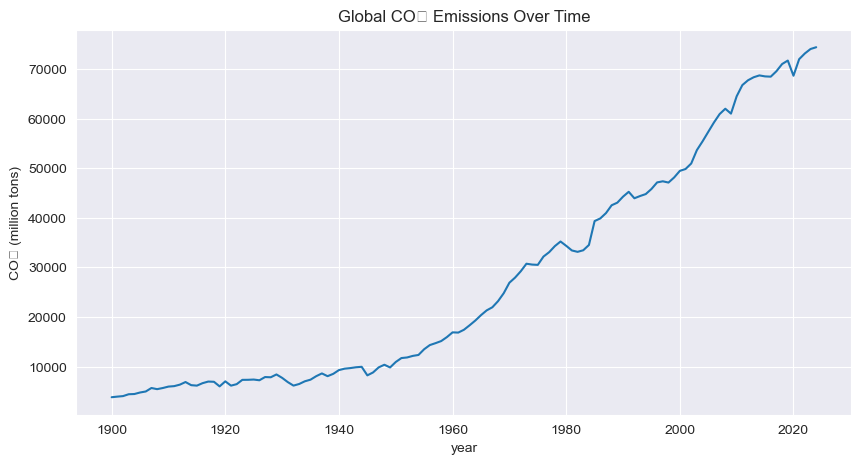

In [14]:
global_co2 = df.groupby("year")["co2"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=global_co2, x="year", y="co2")
plt.title("Global CO₂ Emissions Over Time")
plt.ylabel("CO₂ (million tons)")
plt.show()

In [15]:
latest_year = df['year'][df['gdp'].notna()].max()

C:\Users\Mehmet Tosun\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


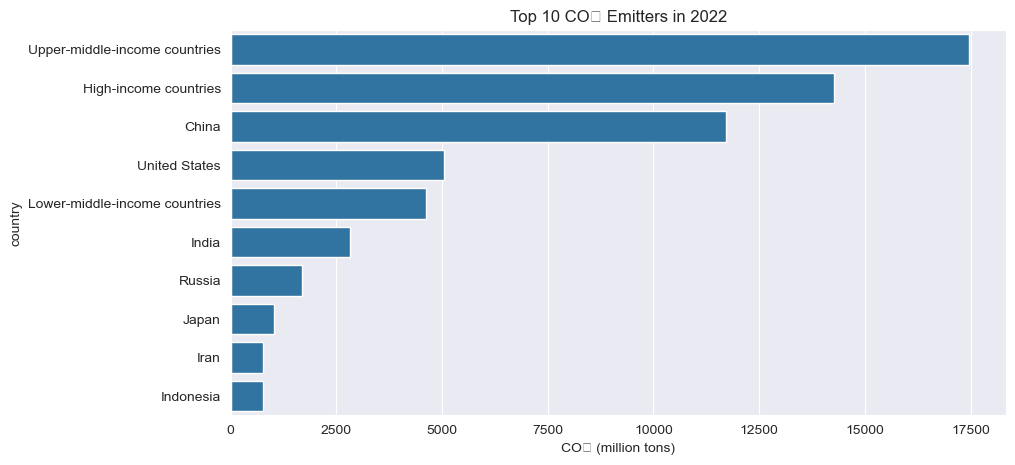

In [16]:
top_emitters = (
    df[df["year"] == latest_year]
    .sort_values("co2", ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(data=top_emitters, x="co2", y="country")
plt.title(f"Top 10 CO₂ Emitters in {latest_year}")
plt.xlabel("CO₂ (million tons)")
plt.show()

C:\Users\Mehmet Tosun\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


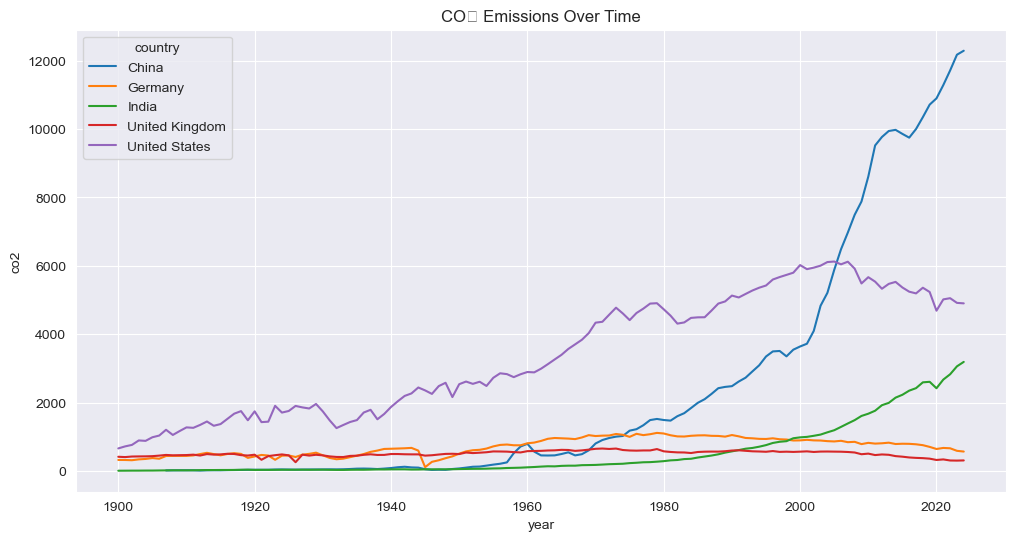

In [17]:
countries = ["China", "United States", "India", "Germany", "United Kingdom"]

subset = df[df["country"].isin(countries)]

plt.figure(figsize=(12,6))
sns.lineplot(data=subset, x="year", y="co2", hue="country")
plt.title("CO₂ Emissions Over Time")
plt.show()

In [18]:
country = "Germany"  # choose any

subset = df[df["country"] == country]

fig = px.area(
    subset,
    x="year",
    y=["renewables_share_energy", "fossil_share_energy", "low_carbon_share_energy"],
    title=f"Energy Mix Over Time: {country}",
    labels={"value": "Energy Share (%)", "year": "Year"}
)

fig.show()

In [19]:
subset = df.melt(
    id_vars=['country','year'],
    value_vars=['renewables_share_energy','fossil_share_energy','low_carbon_share_energy'],
    var_name='source', value_name='share'
)
subset.to_csv("energy_mix_long.csv", index=False)

In [20]:
year = df.dropna(subset=["gdp", "co2"]).year.max()

plot_df = df[df["year"] == year].dropna(subset=["gdp", "co2", "population"])

fig = px.scatter(
    plot_df,
    x="gdp",
    y="co2",
    size="population",
    hover_name="country",
    log_x=True,
    title=f"CO₂ vs GDP in {year}"
)

fig.show()

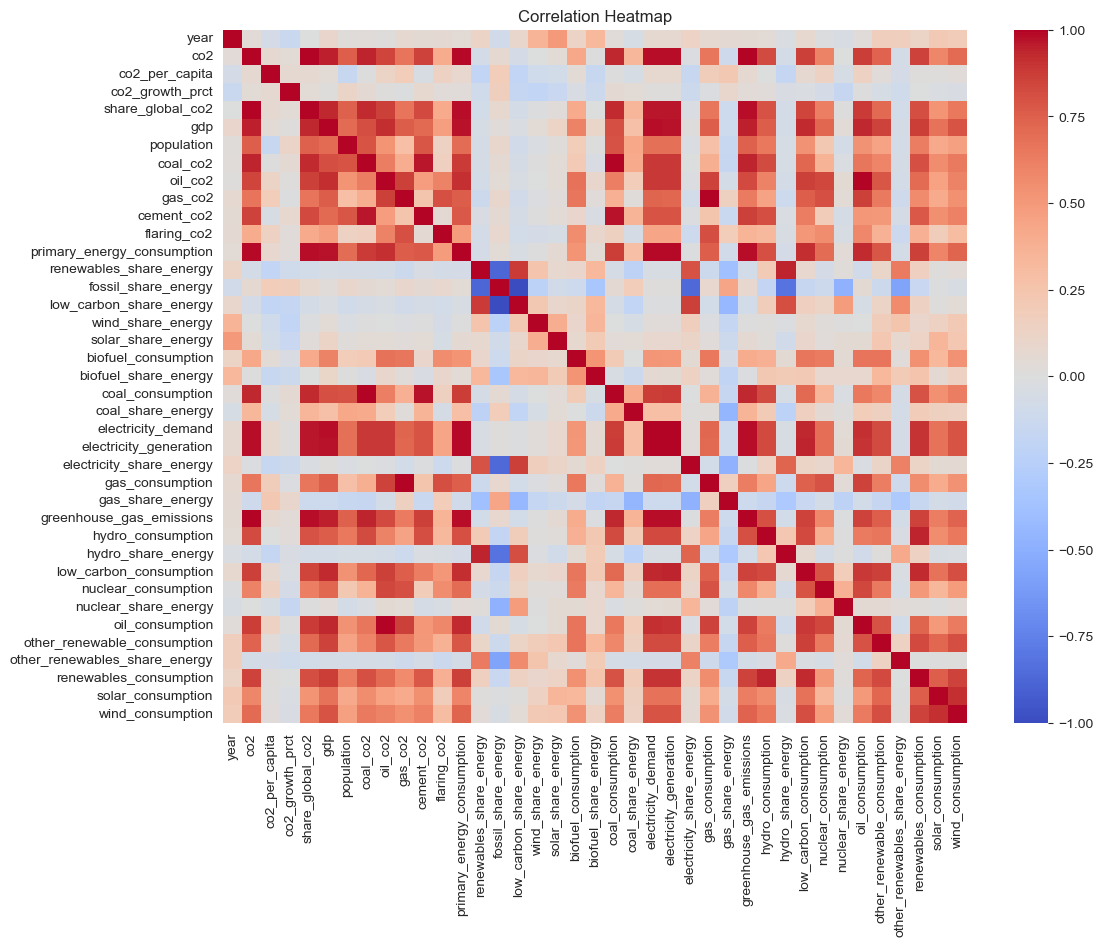

In [21]:
numeric_df = df.select_dtypes(include=[np.number]).dropna()

plt.figure(figsize=(12, 9))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

In [22]:
fig = px.scatter(
    df[df["year"] == latest_year],
    x="renewables_share_energy",
    y="co2_per_capita",
    hover_name="country",
    trendline="ols",
    title=f"Renewable Share vs CO₂ Per Capita ({latest_year})"
)

fig.show()

In [25]:
import plotly.express as px

In [26]:
top_gdp = (
    df[df["year"] == latest_year]
    .sort_values(['gdp'], ascending=False)
    .head(10)
    .sort_values(['gdp'], ascending=True)
)

fig_top_gdp = px.bar(
    top_gdp,
    x="gdp",
    y="country",
    orientation='h',
    title=f"Top 10 GDP in {latest_year}",
)
fig_top_gdp.show()